In [1]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.transformation_df import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)

df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
display(df)

,match_id,tournament_event_id,match_num,date,surface,indoor,round,best_of,winner_id,winner_country_id,...,w_bp_fc,l_ace,l_df,l_sv_pt,l_1st_in,l_1st_won,l_2nd_won,l_sv_gms,l_bp_sv,l_bp_fc
0,114497,2826,8,2000-06-12,G,False,R64,3,2925,USA,...,4.0,1.0,4.0,78.0,35.0,21.0,24.0,13.0,4.0,8.0
1,114498,2826,9,2000-06-12,G,False,R64,3,2148,FRA,...,11.0,0.0,2.0,59.0,34.0,19.0,8.0,9.0,2.0,7.0
2,114501,2826,12,2000-06-12,G,False,R64,3,1609,USA,...,4.0,5.0,4.0,55.0,26.0,18.0,10.0,8.0,2.0,6.0
3,114505,2826,16,2000-06-12,G,False,R64,3,3206,FRA,...,3.0,0.0,6.0,42.0,23.0,9.0,4.0,7.0,6.0,12.0
4,114506,2826,17,2000-06-12,G,False,R64,3,2106,ITA,...,5.0,6.0,3.0,99.0,50.0,42.0,15.0,15.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46198,180739,4452,25,2008-10-06,H,True,R32,3,4868,FRA,...,1.0,3.0,3.0,89.0,50.0,31.0,23.0,13.0,3.0,6.0
46199,180745,4452,31,2008-10-06,H,True,R32,3,4994,GER,...,4.0,2.0,2.0,89.0,52.0,32.0,19.0,10.0,12.0,15.0
46200,180750,4452,12,2008-10-06,H,True,R16,3,4677,SRB,...,5.0,1.0,1.0,68.0,42.0,26.0,10.0,9.0,4.0,8.0
46201,180751,4452,13,2008-10-06,H,True,R16,3,3857,RUS,...,7.0,3.0,2.0,58.0,36.0,18.0,8.0,10.0,1.0,7.0


In [2]:
import numpy as np

data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
new_df.drop(['w_1st_in','l_1st_in'],axis=1,inplace=True)
new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
display(new_df)

,match_id,w_ace,l_ace,w_df,l_df,w_tt_p,w_sv_w,l_sv_w,w_1st_w,l_1st_w,...,w_r_game_w,l_r_game_w,w_r_gm_w_set,l_r_gm_w_set,w_gm_w,l_gm_w,w_g_dominance,l_g_dominance,w_br_ratio,l_br_ratio
0,114497,0.072464,0.012821,0.014493,0.051282,0.530612,0.652174,0.576923,0.725000,0.600000,...,0.307692,0.166667,1.333333,0.666667,0.560000,0.440000,1.846154,0.541667,1.000000,1.000000
1,114498,0.049383,0.000000,0.061728,0.033898,0.571429,0.592593,0.457627,0.682927,0.558824,...,0.555556,0.300000,2.500000,1.500000,0.631579,0.368421,1.851852,0.540000,2.619048,0.381818
2,114501,0.084746,0.090909,0.084746,0.072727,0.578947,0.661017,0.509091,0.771429,0.692308,...,0.500000,0.111111,2.000000,0.500000,0.705882,0.294118,4.500000,0.222222,2.666667,0.375000
3,114505,0.125000,0.000000,0.025000,0.142857,0.682927,0.675000,0.309524,0.750000,0.391304,...,0.857143,0.000000,3.000000,0.000000,0.923077,0.076923,inf,0.000000,inf,0.000000
4,114506,0.070707,0.060606,0.020202,0.030303,0.540404,0.656566,0.575758,0.788462,0.840000,...,0.333333,0.133333,1.666667,0.666667,0.600000,0.400000,2.500000,0.400000,1.250000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46198,180739,0.051948,0.033708,0.025974,0.033708,0.536145,0.701299,0.606742,0.700000,0.620000,...,0.230769,0.076923,1.000000,0.333333,0.576923,0.423077,3.000000,0.333333,0.500000,2.000000
46199,180745,0.095890,0.022472,0.068493,0.022472,0.537037,0.671233,0.573034,0.769231,0.615385,...,0.300000,0.181818,1.500000,1.000000,0.571429,0.428571,1.650000,0.606061,0.400000,2.500000
46200,180750,0.075472,0.014706,0.056604,0.014706,0.553719,0.660377,0.529412,0.846154,0.619048,...,0.444444,0.200000,2.000000,1.000000,0.631579,0.368421,2.222222,0.450000,1.250000,0.800000
46201,180751,0.046154,0.051724,0.000000,0.034483,0.552846,0.553846,0.448276,0.631579,0.500000,...,0.600000,0.333333,3.000000,1.500000,0.631579,0.368421,1.800000,0.555556,2.000000,0.500000


In [262]:
data_extractor.get_match_details(118076)

,match_id,date,first_name,last_name,first_name,last_name
0,118076,2001-07-23,Albert,Costa,Wayne,Arthurs


In [263]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [264]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)




,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,ace,25675,0.08,0.06,0.02,1.0,0.0
1,df,25675,0.04,0.05,-0.01,0.0,1.0
2,tt_p,25675,0.54,0.46,0.08,1.0,0.0
3,sv_w,25675,0.66,0.57,0.08,1.0,0.0
4,1st_won,25675,0.74,0.66,0.08,1.0,0.0
5,2nd_won,25675,0.53,0.45,0.08,1.0,0.0
6,bp_sv,25675,0.57,0.51,0.06,1.0,0.0
7,r_1st_won,25675,0.34,0.26,0.08,1.0,0.0
8,r_2st_won,25675,0.55,0.47,0.08,1.0,0.0
9,bp_w,25675,0.49,0.43,0.06,1.0,0.0


In [265]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2
    

chi_square=ch_calculate(new_df[[i for i in new_df.columns if "w_" in i]])

  2%|▏         | 18/1156 [00:17<18:05,  1.05it/s]


KeyboardInterrupt: 

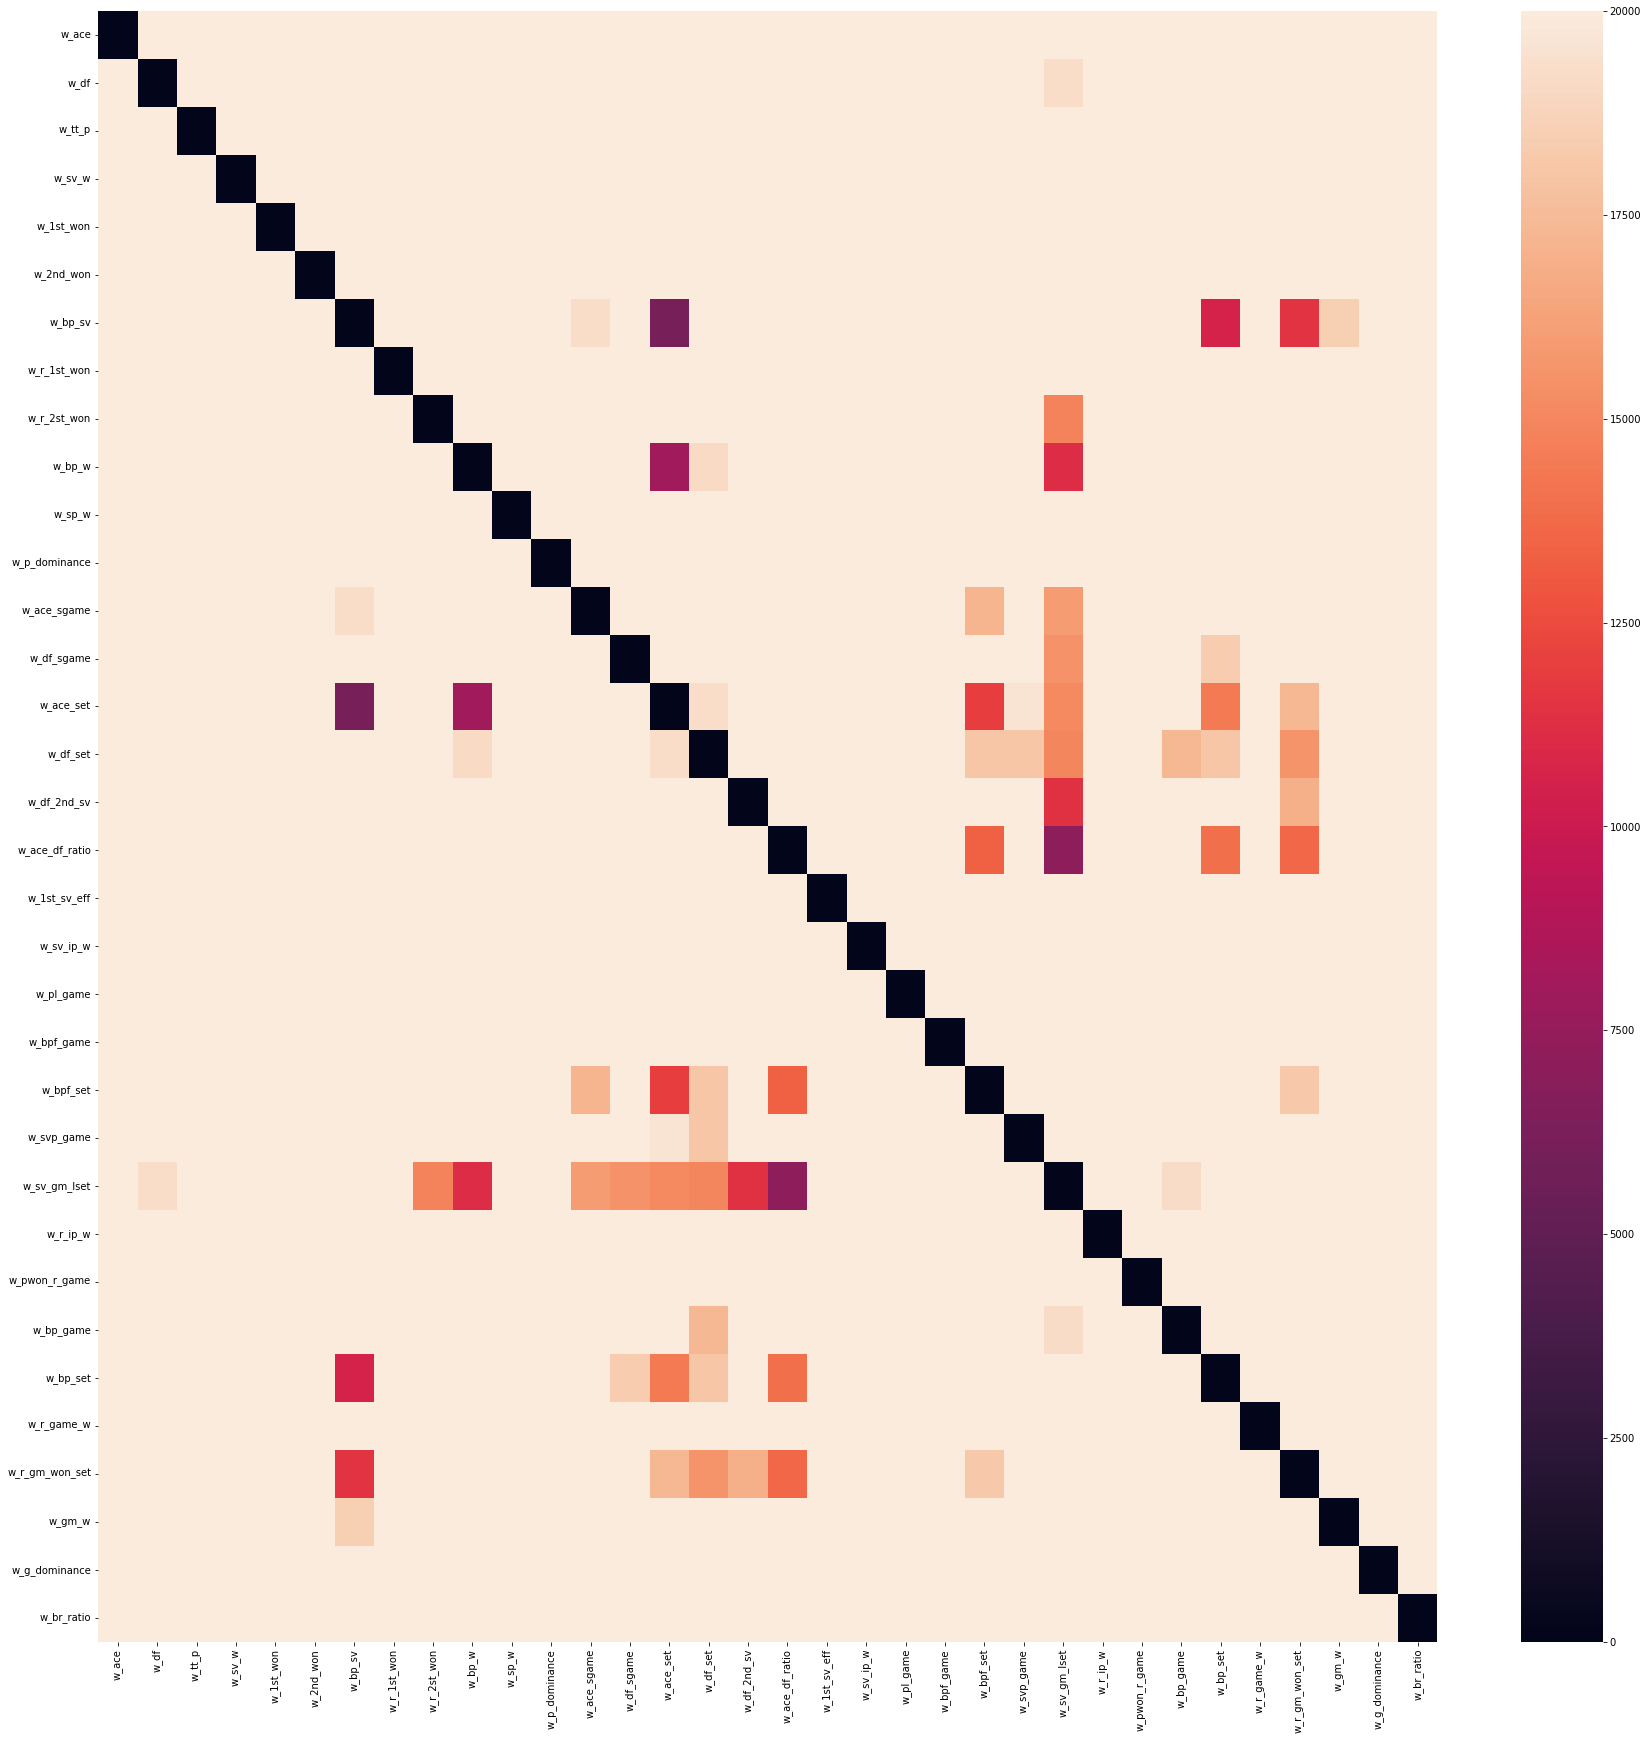

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=20000)
plt.show()